In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

Text(0.5, 1.0, 'Outcome of 10000 Dice Rolls')

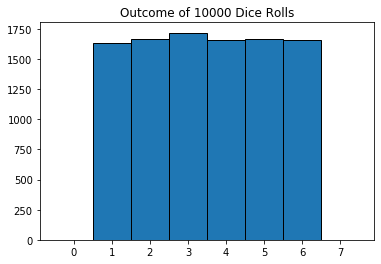

In [58]:
x = stats.randint(1,7).rvs((10000))

plt.hist(x, bins=range(0, 9), align='left', width=1, edgecolor='black')
plt.title(f'Outcome of 10000 Dice Rolls')

(array([0.000e+00, 4.000e+00, 1.500e+01, 7.000e+01, 2.010e+02, 4.840e+02,
        8.360e+02, 1.182e+03, 1.501e+03, 1.529e+03, 1.432e+03, 1.105e+03,
        7.800e+02, 4.440e+02, 2.440e+02, 1.000e+02, 4.800e+01, 2.100e+01,
        2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 29 Patch objects>)

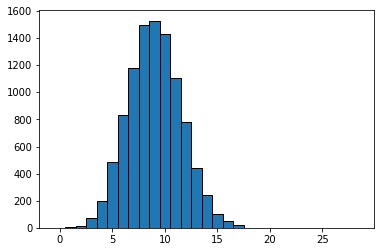

In [89]:
x = stats.binom(30,.3).rvs(10000)

plt.hist(x, bins=range(0, 30), align='left', width=1, edgecolor='black')

(array([  3.,  11.,  43., 131., 200., 267., 222.,  86.,  28.,   9.]),
 array([ 1.93135053,  5.29719998,  8.66304943, 12.02889888, 15.39474833,
        18.76059778, 22.12644723, 25.49229668, 28.85814614, 32.22399559,
        35.58984504]),
 <a list of 10 Patch objects>)

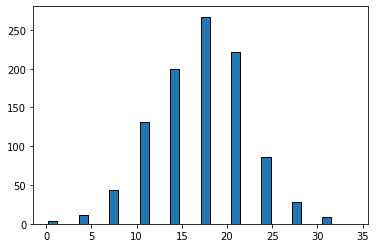

In [121]:
x = stats.norm(20,5).rvs(1000)

plt.hist(x, align='left', width=1, edgecolor='black')

In [133]:
np.random.choice((1,2,3,4,5,6),1000).reshape(100,10)

array([[6, 5, 4, 2, 4, 6, 3, 1, 1, 2],
       [3, 6, 5, 2, 2, 4, 5, 6, 3, 2],
       [4, 6, 2, 5, 5, 4, 3, 3, 3, 1],
       [1, 6, 1, 3, 5, 1, 2, 2, 5, 4],
       [1, 3, 5, 4, 5, 1, 3, 4, 1, 3],
       [4, 5, 3, 2, 4, 4, 6, 2, 1, 2],
       [3, 1, 2, 4, 4, 1, 4, 1, 4, 2],
       [2, 6, 1, 6, 1, 2, 3, 1, 6, 3],
       [3, 4, 2, 1, 6, 1, 6, 1, 3, 3],
       [3, 1, 3, 2, 4, 4, 6, 4, 1, 1],
       [3, 2, 1, 1, 6, 5, 4, 2, 6, 5],
       [1, 5, 4, 3, 6, 4, 1, 1, 2, 5],
       [4, 1, 4, 6, 6, 1, 3, 5, 5, 5],
       [2, 4, 2, 5, 6, 5, 1, 5, 1, 4],
       [6, 4, 1, 6, 1, 5, 5, 2, 2, 4],
       [2, 5, 1, 6, 4, 4, 6, 2, 1, 3],
       [6, 5, 1, 6, 6, 1, 5, 5, 3, 4],
       [6, 1, 2, 1, 1, 6, 4, 3, 1, 1],
       [6, 1, 4, 3, 5, 3, 3, 4, 6, 1],
       [2, 3, 3, 3, 2, 3, 3, 6, 1, 6],
       [1, 5, 5, 4, 5, 1, 6, 6, 4, 5],
       [1, 3, 5, 5, 2, 1, 6, 1, 2, 3],
       [5, 1, 6, 2, 2, 1, 6, 2, 6, 6],
       [5, 4, 5, 6, 1, 2, 1, 5, 5, 2],
       [3, 3, 6, 1, 6, 4, 1, 6, 3, 5],
       [6, 2, 1, 2, 3, 3,